<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
%matplotlib notebook

import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import utils.directories as ds

In [ ]:
# TODO: convert files to UTF-8?
geo = pd.read_csv( ds.interim_path("nodes_geo.csv"), encoding='latin-1' )

<IPython.core.display.Javascript object>


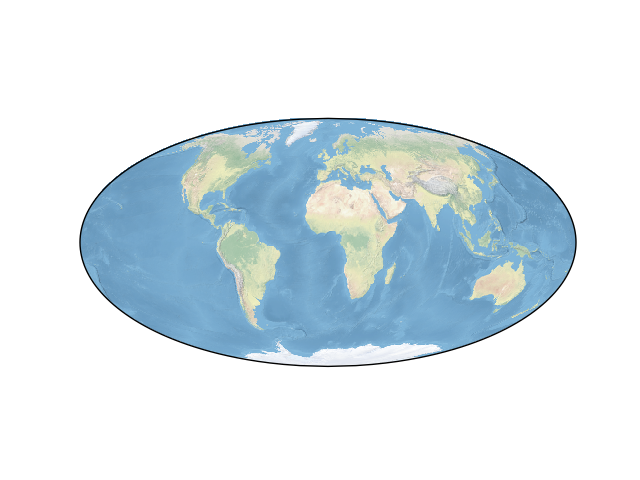

In [6]:
ax = plt.axes(projection=ccrs.Mollweide())
ax.stock_img()
plt.show()